손글씨 글자인식 연습
========

MNIST 데이터셋을 사용하여 글자인식을 연습해보자

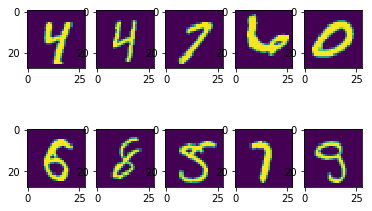

In [16]:
import numpy as np
import matplotlib.pylab as plt
import mnist

fig, subplots = plt.subplots(2, 5)

# MNIST 데이터셋 로드
MNIST = mnist.load(normalize=True, flatten=True)
images = MNIST['train_img']
sample = images[np.random.choice(images.shape[0], subplots.size)]

for i, subplot in enumerate(subplots.flatten()):
    subplot.imshow(sample[i].reshape(28, -1))
plt.show()
plt.close(fig)

In [17]:
import lzma
import pickle

#
# Utility functions
#
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def softmax(A):
    ExpA = np.exp(A - np.max(A))
    return ExpA / np.sum(ExpA)

def predict(input_image):
    Z1 = sigmoid(input_image @ DATA['W1'] + DATA['b1'])
    Z2 = sigmoid(Z1 @ DATA['W2'] + DATA['b2'])
    return softmax(Z2 @ DATA['W3'] + DATA['b3'])

#
# Load data
#
print('데이터 로드 ... ', end='')
# 미리 학습된 네트워크를 로드함
with lzma.open('3-mnist-sample-weight.pkl.xz') as pickled_file:
    DATA = pickle.load(pickled_file)
print('완료!\n')

#
# 정확도 측정
#
correct = total = 0
for is_correct in np.nditer(np.argmax(predict(MNIST['test_img']), axis=1) == MNIST['test_label']):
    total += 1
    if is_correct:
        correct += 1
accuracy = correct / total
print(f'정답률 : {accuracy*100:.05}%')

데이터 로드 ... 완료!

정답률 : 93.52%
